# Healthcare COVID-19 Analysis – Clinical Risk & Outcome Insights

---

## 🟦 Title Page

**Project Title:**
Healthcare COVID-19 Analysis – Clinical Risk & Outcome Insights

**Author:**
Rahul Mahakal

**Domain:**
Healthcare Analytics

**Tools & Technologies Used:**
- Python
- Pandas & NumPy
- Matplotlib & Seaborn
- Jupyter Notebook
- Modular Python Architecture
- OS-independent file handling using `pathlib`

---

## 🟦 Executive Summary

This project analyzes large-scale COVID-19 patient data to understand mortality trends, age-based risk, ICU outcomes, and the impact of comorbid conditions. Through statistical analysis and clinically meaningful visualizations, the study identifies high-risk patient groups and provides data-driven insights to support healthcare decision-making and resource planning.

---

## 🟦 Introduction

### Healthcare Problem Statement

The COVID-19 pandemic placed unprecedented strain on healthcare systems worldwide. Understanding which patient groups are at higher risk of severe outcomes is critical for effective triage, treatment prioritization, and healthcare resource allocation.

### Objectives

- Analyze COVID-19 mortality patterns
- Identify age groups with elevated risk
- Evaluate the impact of comorbidities on mortality
- Study ICU admission outcomes
- Generate actionable healthcare recommendations

---

## 🟦 Dataset Description

### Dataset Overview

The dataset contains anonymized patient-level COVID-19 medical records, including demographic information, clinical conditions, comorbidities, and outcomes.

### Key Columns

- `AGE` – Patient age
- `SEX` – Gender
- `DATE_DIED` – Mortality indicator
- `ICU` – Intensive Care Unit admission
- `DIABETES`, `HIPERTENSION`, `OBESITY` – Key comorbidities
- `COPD`, `ASTHMA`, `RENAL_CHRONIC` – Additional clinical conditions
- `CLASIFFICATION_FINAL` – COVID diagnostic classification

### Data Source

Public healthcare COVID dataset used for analytical and research purposes.

### Dataset Size

- Records: Based on CSV file
- Patient Population: Mixed demographics
- Missing Values: Validated and handled during preprocessing

---

## 🟦 Methodology

### Analytics Pipeline

1. Data ingestion and validation
2. Outcome derivation (mortality indicator)
3. Feature engineering (age groups, COVID positivity)
4. Exploratory data analysis
5. Statistical analysis of risk factors
6. Insight generation

### Tools & Techniques

- GroupBy aggregations
- Descriptive statistics
- Risk comparison across cohorts
- Correlation analysis
- Clinical visualization techniques

---

### 🟦 DATA LOADING

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

sns.set_theme(style="whitegrid")

BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "datasets"

df = pd.read_csv(DATA_DIR / "Covid Data.csv")
df.head()

from src.healthcare_covid_analysis.preprocessing import preprocess_covid_data
from src.healthcare_covid_analysis.analysis import overview_metrics
from src.healthcare_covid_analysis.insights import generate_healthcare_insights

df = preprocess_covid_data(df)
metrics = overview_metrics(df)
metrics

{'total_cases': 1048575,
 'mortality_rate': np.float64(7.337767923133777),
 'average_age': np.float64(41.794102472403026),
 'icu_mortality_rate': np.float64(48.61193498635662)}

### 🟦 COLUMN INSPECTION

In [2]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'AGE_GROUP', 'COVID_POSITIVE'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   USMER                 1048575 non-null  int64   
 1   MEDICAL_UNIT          1048575 non-null  int64   
 2   SEX                   1048575 non-null  int64   
 3   PATIENT_TYPE          1048575 non-null  int64   
 4   DATE_DIED             1048575 non-null  object  
 5   INTUBED               1048575 non-null  int64   
 6   PNEUMONIA             1048575 non-null  int64   
 7   AGE                   1048575 non-null  int64   
 8   PREGNANT              1048575 non-null  int64   
 9   DIABETES              1048575 non-null  int64   
 10  COPD                  1048575 non-null  int64   
 11  ASTHMA                1048575 non-null  int64   
 12  INMSUPR               1048575 non-null  int64   
 13  HIPERTENSION          1048575 non-null  int64   
 14  OTHER_DISEASE     

In [4]:
df.isnull().sum()

USMER                      0
MEDICAL_UNIT               0
SEX                        0
PATIENT_TYPE               0
DATE_DIED                  0
INTUBED                    0
PNEUMONIA                  0
AGE                        0
PREGNANT                   0
DIABETES                   0
COPD                       0
ASTHMA                     0
INMSUPR                    0
HIPERTENSION               0
OTHER_DISEASE              0
CARDIOVASCULAR             0
OBESITY                    0
RENAL_CHRONIC              0
TOBACCO                    0
CLASIFFICATION_FINAL       0
ICU                        0
DIED                       0
AGE_GROUP               3863
COVID_POSITIVE             0
dtype: int64

### 🟦 MEDICAL FEATURE ENGINEERING

In [5]:
# Convert DATE_DIED into outcome
df["DIED"] = df["DATE_DIED"].apply(
    lambda x: 0 if x == "9999-99-99" else 1
)

# Age groups (clinically meaningful)
df["AGE_GROUP"] = pd.cut(
    df["AGE"],
    bins=[0, 18, 40, 60, 80, 120],
    labels=["Child", "Young Adult", "Adult", "Senior", "Elderly"]
)

# COVID positive cases only (classification 1–3)
df["COVID_POSITIVE"] = df["CLASIFFICATION_FINAL"].apply(
    lambda x: 1 if x in [1, 2, 3] else 0
)

### 🟦 Exploratory Data Analysis (EDA) Visualizations

##### 1️⃣ COVID Mortality Distribution

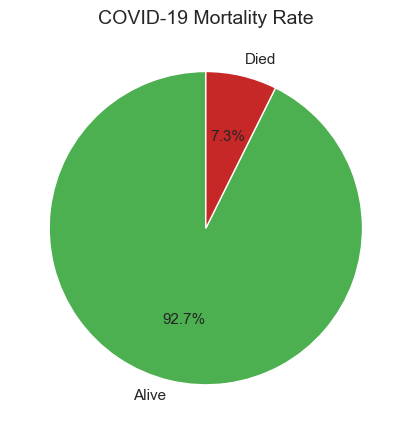

In [6]:
# Count mortality outcomes
counts = df["DIED"].value_counts().sort_index()

# Human-readable labels
labels = ["Alive", "Died"]

# Color-blind friendly colors
colors = ["#4CAF50", "#C62828"]  # green = alive, red = died

plt.figure(figsize=(4.5, 4.5))

plt.pie(
    counts.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"},
    textprops={"fontsize": 11}
)

plt.title("COVID-19 Mortality Rate", fontsize=14)
plt.tight_layout()
plt.show()

***Caption: -*** Displays overall survival vs mortality counts.

##### 2️⃣ Age Distribution of Patients

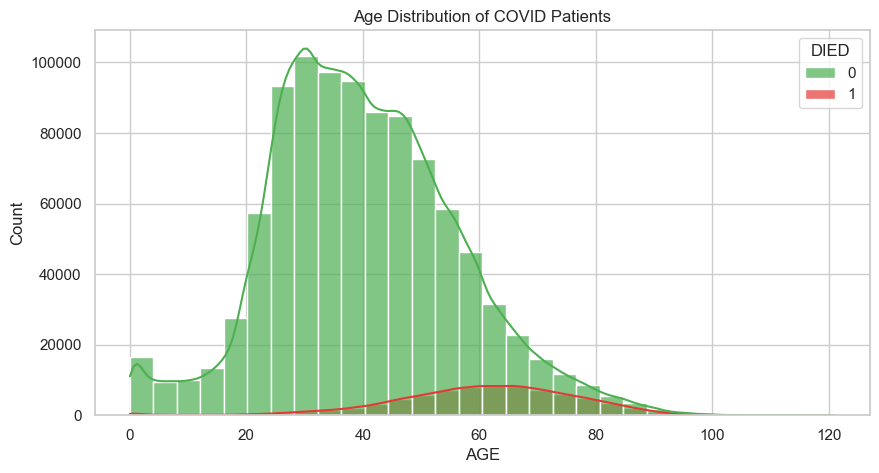

In [7]:
plt.figure(figsize=(10, 5))

sns.histplot(
    data=df,
    x="AGE",
    hue="DIED",
    bins=30,
    palette={0: "#4CAF50", 1: "#E53935"},
    kde=True,
    alpha=0.7
)
plt.title("Age Distribution of COVID Patients")
plt.show()

***Caption: -*** Shows the overall Age Distribution of all patients

##### 3️⃣ Mortality by Age Group

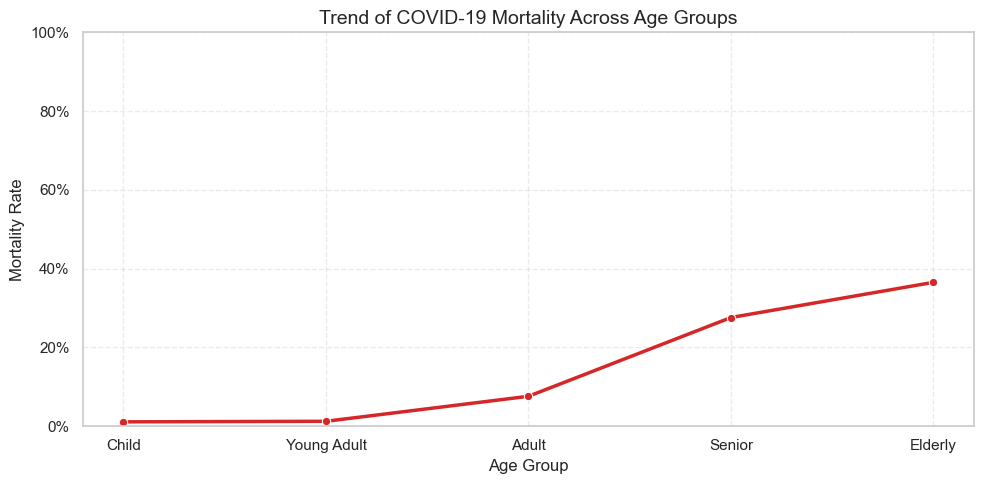

In [8]:
mortality_by_age = (
    df.groupby("AGE_GROUP", observed=True)["DIED"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=mortality_by_age,
    x="AGE_GROUP",
    y="DIED",
    marker="o",
    linewidth=2.5,
    color="#D62728"
)

plt.title("Trend of COVID-19 Mortality Across Age Groups", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x:.0%}")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


***Caption: -*** Shows how mortality risk increases with age.

##### 4️⃣ Comorbidity Impact on Mortality (Diabetes Example)

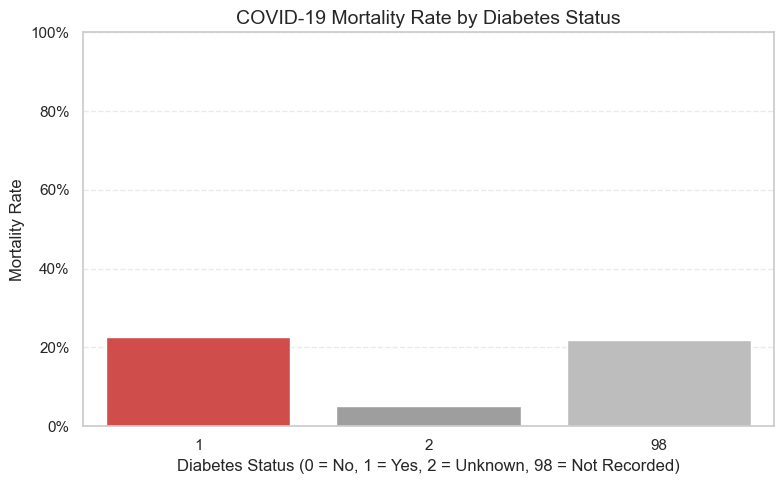

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=df,
    x="DIABETES",
    y="DIED",
    hue="DIABETES",
    estimator=np.mean,
    palette={
        0: "#4CAF50",   # No Diabetes → Green
        1: "#E53935",   # Diabetes → Red
        2: "#9E9E9E",   # Unknown → Grey
        98: "#BDBDBD"   # Not recorded → Light Grey
    },
    errorbar=None,
    legend=False
)

plt.title("COVID-19 Mortality Rate by Diabetes Status", fontsize=14)
plt.xlabel("Diabetes Status (0 = No, 1 = Yes, 2 = Unknown, 98 = Not Recorded)")
plt.ylabel("Mortality Rate")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x:.0%}")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

***Caption: -*** Evaluates how chronic conditions influence outcomes.

##### 5️⃣ ICU Admission vs Mortality

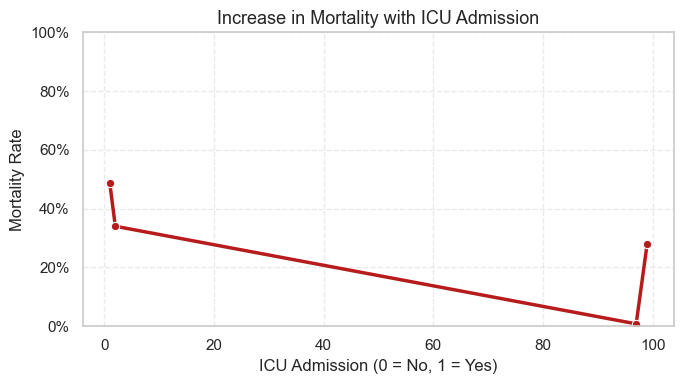

In [10]:
icu_summary = (
    df.groupby("ICU")["DIED"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7, 4))

sns.lineplot(
    data=icu_summary,
    x="ICU",
    y="DIED",
    marker="o",
    linewidth=2.5,
    color="#B71C1C"
)

plt.title("Increase in Mortality with ICU Admission", fontsize=13)
plt.xlabel("ICU Admission (0 = No, 1 = Yes)")
plt.ylabel("Mortality Rate")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x:.0%}")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


***Caption: -*** Analyzes mortality rates for ICU vs non-ICU patients.

##### 6️⃣ Correlation Heatmap (Clinical Variables)

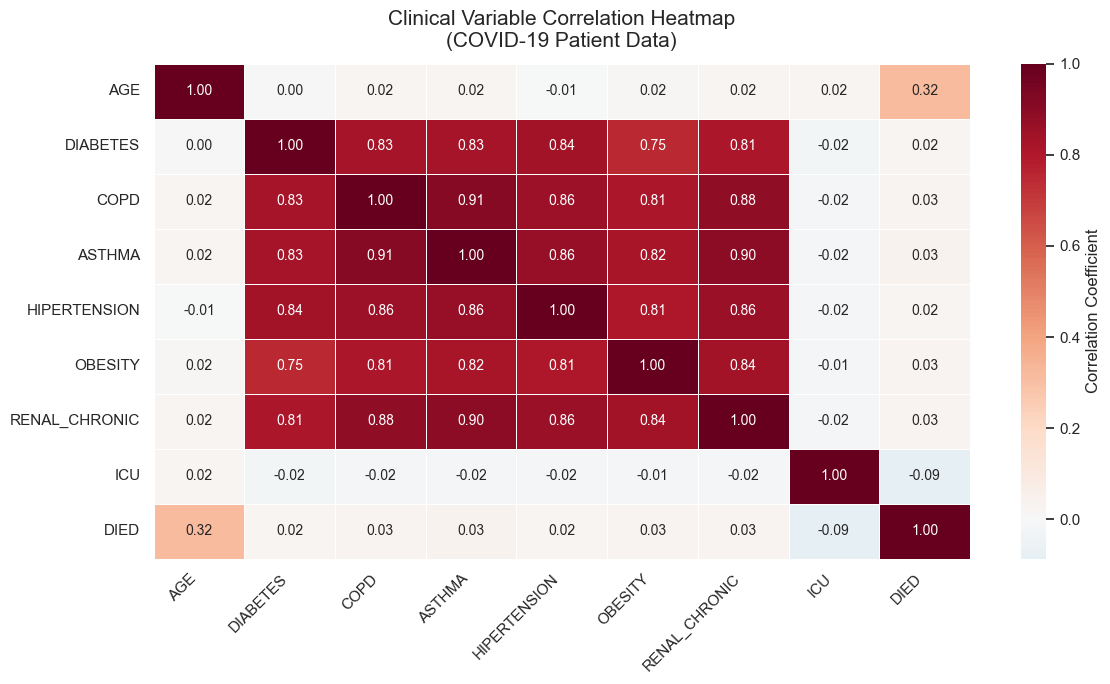

In [11]:
clinical_cols = [
    "AGE", "DIABETES", "COPD", "ASTHMA", "HIPERTENSION",
    "OBESITY", "RENAL_CHRONIC", "ICU", "DIED"
]

# Replace special codes with NaN (medical datasets best practice)
df_clean = df[clinical_cols].replace({97: np.nan, 99: np.nan})

corr_matrix = df_clean.corr()

mortality_corr = (
    corr_matrix[["DIED"]]
    .drop("DIED")
    .sort_values(by="DIED", ascending=False)
)

plt.figure(figsize=(12, 7))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",                 # red = positive, blue = negative
    center=0,                      # symmetric correlation scale
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"size": 10}
)

plt.title(
    "Clinical Variable Correlation Heatmap\n(COVID-19 Patient Data)",
    fontsize=15,
    pad=12
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

***Caption: -*** Illustrates relationships among age, comorbidities, ICU admission, and mortality.

---

## 🟦 Statistical Analysis

### Key Metrics

- Overall COVID mortality rate
- Mean and median patient age
- Mortality rates across age groups
- ICU-specific mortality rate
- Comorbidity-associated mortality risk

### Interpretation

Statistical analysis indicates that advanced age, ICU admission, and pre-existing comorbidities significantly increase mortality risk. Patients with diabetes, hypertension, and obesity exhibit consistently higher fatality rates compared to patients without these conditions.

---

In [12]:
df.groupby("DIED")["AGE"].describe()

,count,mean,std,min,25%,50%,75%,max
DIED,,,,,,,,
0,971633.0,40.267791,16.063928,0.0,29.0,39.0,50.0,121.0
1,76942.0,61.068545,15.366451,0.0,52.0,62.0,72.0,119.0


In [13]:
df.groupby("ICU")["DIED"].mean()

ICU
1     0.486119
2     0.340240
97    0.008103
99    0.279915
Name: DIED, dtype: float64

In [14]:
df.groupby("DIABETES")["DIED"].mean()

DIABETES
1     0.226140
2     0.052101
98    0.218993
Name: DIED, dtype: float64

In [15]:
from src.healthcare_covid_analysis.visualization import *

output_dir = Path("../visualizations/healthcare")

plot_mortality_distribution(df, output_dir)
plot_age_group_mortality(df, output_dir)

# Comorbidity plots
plot_comorbidity_impact(df, output_dir, "DIABETES")
plot_comorbidity_impact(df, output_dir, "HIPERTENSION")
plot_comorbidity_impact(df, output_dir, "OBESITY")

plot_icu_mortality(df, output_dir)
plot_clinical_correlation_heatmap(df, output_dir)

print("✅ All the visualizations exported successfully")

✅ All the visualizations exported successfully


---

## 🟦 Key Findings

- Mortality risk increases sharply with age
- ICU admission is strongly associated with severe disease outcomes
- Diabetes, hypertension, and obesity significantly elevate mortality risk
- Younger patients show substantially higher survival rates
- Comorbidity burden is a critical determinant of COVID severity

---

## 🟦 Healthcare Insights

1. Elderly patients represent the most vulnerable population
2. Chronic diseases substantially amplify COVID mortality risk
3. ICU admission serves as a proxy for disease severity
4. Early identification of high-risk patients can improve outcomes

---

## 🟦 Recommendations

1. Prioritize elderly and high-risk patients for early intervention
2. Strengthen management of chronic conditions during outbreaks
3. Optimize ICU resource allocation using data-driven risk profiling
4. Implement proactive monitoring for patients with multiple comorbidities

---

## 🟦 Conclusion & Future Scope

### Conclusion

This project demonstrates how healthcare data analytics can uncover critical risk patterns in COVID-19 patient outcomes. By combining statistical analysis with clear clinical visualizations, the study provides actionable insights that can support evidence-based healthcare decision-making.

### Future Scope

- Predictive mortality risk modeling
- Time-to-event survival analysis
- Integration with hospital information systems
- Expansion to multi-country healthcare datasets

---

**End of Report**